# 유전자 발현데이터를 통해 피부암 환자의 사망률을 예측한다


In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 

In [3]:
#데이터 불러오기
data_table= pd.read_csv("counts.txt.bz2", index_col=0)


In [4]:
# 각 행은 세포의 종류이고 , 인덱스는 유전자의 종류이다


data_table.head()

,00624286-41dd-476f-a63b-d2a5f484bb45,TCGA-FS-A1Z0,TCGA-D9-A3Z1,02c76d24-f1d2-4029-95b4-8be3bda8fdbe,TCGA-EB-A51B,TCGA-D3-A1Q3,TCGA-FR-A44A,TCGA-EE-A17Z,TCGA-D3-A51G,TCGA-D3-A51E,...,TCGA-D9-A149,TCGA-EE-A3AG,TCGA-D9-A4Z2,TCGA-EB-A4OZ,TCGA-EE-A3J4,TCGA-FS-A1ZM,TCGA-D3-A5GS,TCGA-EB-A3XF,TCGA-EE-A2GE,ff7431a9-243a-4651-80bb-096379925bbe
A1BG,1272.36,452.96,288.06,400.11,420.46,877.59,402.77,559.20,269.59,586.66,...,631.78,560.60,846.55,678.00,32.88,997.41,256.93,461.60,634.06,530.36
A1CF,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
A2BP1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
A2LD1,164.38,552.43,201.83,165.12,95.75,636.63,241.56,30.82,105.44,239.19,...,218.47,274.45,770.04,71.74,17.00,194.26,156.81,84.35,242.01,377.03
A2ML1,27.00,0.00,0.00,0.00,8.00,0.00,1.00,763.00,0.00,0.00,...,3.00,6.00,0.00,1043.00,1.00,852.00,4.00,587.00,0.00,2.00


In [5]:
#샘플정보와 유전정보 길이 데이터가 필요하다

samples=list(data_table.columns)
samples

['00624286-41dd-476f-a63b-d2a5f484bb45',
 'TCGA-FS-A1Z0',
 'TCGA-D9-A3Z1',
 '02c76d24-f1d2-4029-95b4-8be3bda8fdbe',
 'TCGA-EB-A51B',
 'TCGA-D3-A1Q3',
 'TCGA-FR-A44A',
 'TCGA-EE-A17Z',
 'TCGA-D3-A51G',
 'TCGA-D3-A51E',
 'TCGA-EE-A3AD',
 'TCGA-ER-A19J',
 'TCGA-D3-A5GU',
 'TCGA-FS-A4FD',
 'TCGA-ER-A2ND',
 'TCGA-FS-A1ZD',
 'TCGA-EE-A2M6',
 '0e4d53ba-dd42-41b7-bcfe-ff8b9b5dab07',
 'TCGA-EE-A2GN',
 'TCGA-EE-A29V',
 '10f253bd-1cdd-4515-a7fa-b9ed6e1a1790',
 'TCGA-DA-A1HV',
 'TCGA-ER-A19T',
 'TCGA-D3-A5GL',
 'TCGA-FS-A4F2',
 'TCGA-EE-A2GO',
 'TCGA-EB-A1NK',
 'TCGA-FW-A3I3',
 '1589f6a7-211a-458f-a2ad-72c2c175b5e5',
 'TCGA-FS-A1ZA',
 '166144b5-1d22-4a3a-84a9-31bc04e3560f',
 'TCGA-EB-A3XB',
 'TCGA-GN-A268',
 'TCGA-D3-A1Q8',
 'TCGA-D3-A1QA',
 'TCGA-D3-A2JL',
 '1a52c8ac-cabd-4623-98d8-93ee225ab57a',
 'TCGA-BF-A5ER',
 '1b2499f7-bb3e-472a-8216-68b2e137357c',
 'TCGA-EE-A29P',
 'TCGA-DA-A3F8',
 'TCGA-D3-A51K',
 'TCGA-D3-A5GO',
 'TCGA-EE-A3J7',
 '1df21d4e-5070-4d13-897a-a6f124758589',
 'TCGA-EE-A2A1',
 '

In [6]:
#정규화 과정을 거치기 위해 유전정보의 길이가 필요하다

with open ("genes.csv","r") as f:
    gene_info=pd.read_csv(f,index_col=0)
gene_info.head(5)

#유전자의 이름을 index로 지정한다

,GeneID,GeneLength
GeneSymbol,,
CPA1,1357,1724
GUCY2D,3000,3623
UBC,7316,2687
C11orf95,65998,5581
ANKMY2,57037,2611


In [7]:
#유전자의 길이 데이터에는 실제 실험에서 측정한 것보다 더 많은 유전자가 포함된다

print("data_table는 측정 길이 유전자",data_table.shape[0]) #유전자의 측정길이 데이터
print("gene_info는 실제 길이 유전자",gene_info.shape[0])  #유전자의 실제길이 데이터



data_table는 측정 길이 유전자 20500
gene_info는 실제 길이 유전자 20503


In [8]:
# 서로 연관된 유전자를 얻기 위해 필터를 적용해보자


matched_index=pd.Index.intersection(data_table.index, gene_info.index)

In [9]:
# 각 개체의 각 유전자에 대한 발현 수를 포함하는 2차원 ndarray

counts=np.asarray(data_table.loc[matched_index],dtype=int)
gene_names=np.array(matched_index)

In [10]:
gene_names

array(['A1BG', 'A1CF', 'A2BP1', ..., 'ZZZ3', 'psiTPTE22', 'tAKR'],
      dtype=object)

In [11]:
#유전자수와개체 수 확인


print(f'{counts.shape[1]} 개의 개체에 {counts.shape[0]}개의 유전자가 측정됨')

375 개의 개체에 20500개의 유전자가 측정됨


# 개체당 유전자 발현의 수를 정규화

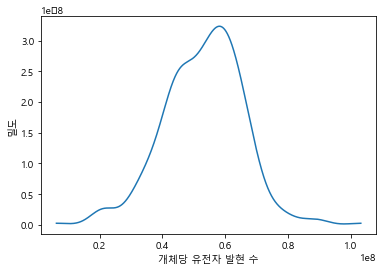

In [16]:
#이제유전자 수 분포 그래프를 그려보자


total_counts=np.sum(counts,axis=0)


# 커널 밀도 추정을 사용한다
density=stats.kde.gaussian_kde(total_counts)
# 측정 범위를 지정한다

x=np.arange(min(total_counts),max(total_counts),10000)

#밀도 그래프 생성
fig,ax=plt.subplots()
ax.plot(x,density(x))
ax.set_xlabel("개체당 유전자 발현 수")
ax.set_ylabel("밀도")


plt.show()

## 샘플 간 공간 크기의 정규화

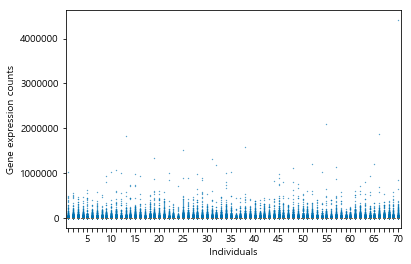

In [29]:
# 그래프를 위한 하위데이터

np.random.seed(seed=7)

# 무작위적으로 70개를 선택

samples_index=np.random.choice(range(counts.shape[1]),size=70,replace=False)
counts_subset=counts[:,samples_index]

# 그래프를 읽기 쉽게 만들기 위한 사용자 정의 x축 레이블



def reduce_xaxis_labels(ax,factor):
    """ x축에 밀집되지 않도로 i 번째 레이블만 표시한다
        factor: x축 레이블 수를 줄이기 위한 정수"""
    plt.setp(ax.xaxis.get_ticklabels(),visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)
        
        
        
# 개체별 발현 수 막대 그래프


fig, ax = plt.subplots(figsize=(6, 4))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(counts_subset)
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene expression counts")
    reduce_xaxis_labels(ax, 5)

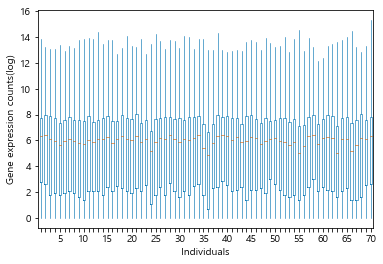

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset+1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene expression counts(log)")
    reduce_xaxis_labels(ax, 5)

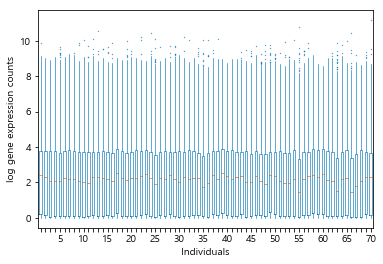

In [32]:
# Normalize by library size
# Divide the expression counts by the total counts for that individual
# Multiply by 1 million to get things back in a similar scale
counts_lib_norm = counts / total_counts * 1000000
# Notice how we just used broadcasting twice there!
counts_subset_lib_norm = counts_lib_norm[:,samples_index]

# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(6, 4))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset_lib_norm + 1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("log gene expression counts")
    reduce_xaxis_labels(ax, 5)

In [33]:
import itertools as it
from collections import defaultdict


def class_boxplot(data, classes, colors=None, **kwargs):
    """Make a boxplot with boxes colored according to the class they belong to.

    Parameters
    ----------
    data : list of array-like of float
        The input data. One boxplot will be generated for each element
        in `data`.
    classes : list of string, same length as `data`
        The class each distribution in `data` belongs to.

    Other parameters
    ----------------
    kwargs : dict
        Keyword arguments to pass on to `plt.boxplot`.
    """
    all_classes = sorted(set(classes))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    class2color = dict(zip(all_classes, it.cycle(colors)))

    # map classes to data vectors
    # other classes get an empty list at that position for offset
    class2data = defaultdict(list)
    for distrib, cls in zip(data, classes):
        for c in all_classes:
            class2data[c].append([])
        class2data[cls][-1] = distrib

    # then, do each boxplot in turn with the appropriate color
    fig, ax = plt.subplots()
    lines = []
    for cls in all_classes:
        # set color for all elements of the boxplot
        for key in ['boxprops', 'whiskerprops', 'flierprops']:
            kwargs.setdefault(key, {}).update(color=class2color[cls])
        # draw the boxplot
        box = ax.boxplot(class2data[cls], **kwargs)
        lines.append(box['whiskers'][0])
    ax.legend(lines, all_classes)
    return ax

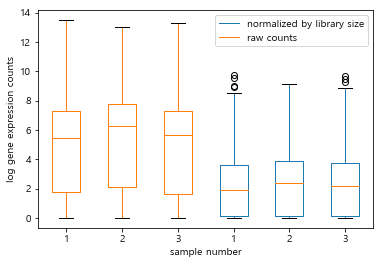

In [34]:
log_counts_3 = list(np.log(counts.T[:3] + 1))
log_ncounts_3 = list(np.log(counts_lib_norm.T[:3] + 1))
ax = class_boxplot(log_counts_3 + log_ncounts_3,
                   ['raw counts'] * 3 + ['normalized by library size'] * 3,
                   labels=[1, 2, 3, 1, 2, 3])
ax.set_xlabel('sample number')
ax.set_ylabel('log gene expression counts');